In [1]:
import os
import pandas as pd
import numpy as np
from pydataset import data
import requests
from env import username, host, password

# modules
import env
import acquire as a
import prepare as p
import wrangle as w

#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_connection(db, user=username, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


def acquire_store():
    
    filename = 'store.csv'
    
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        
        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''
        
        url = get_connection(db='tsa_item_demand')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        
        return df

In [3]:
df = acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
# Using to test out prep_sales()
df2 = df.copy()

# Using your store items data:

## Convert date column to datetime format.

In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode             int64
dtype: object

In [6]:
df = df.set_index('sale_date')
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [7]:
df = df.sort_index()
df.head(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217


## Plot the distribution of sale_amount and item_price.

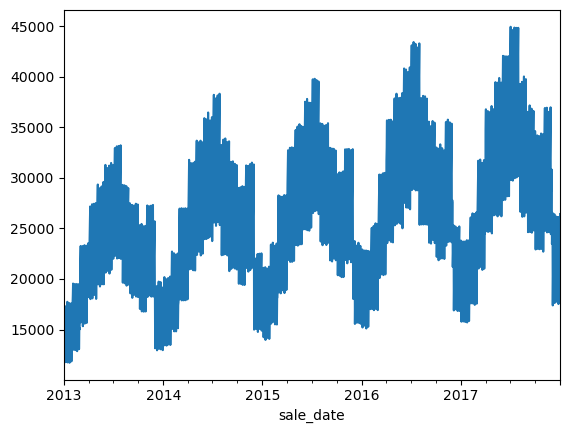

In [8]:
df.groupby('sale_date')['sale_amount'].sum().plot()
plt.show()

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

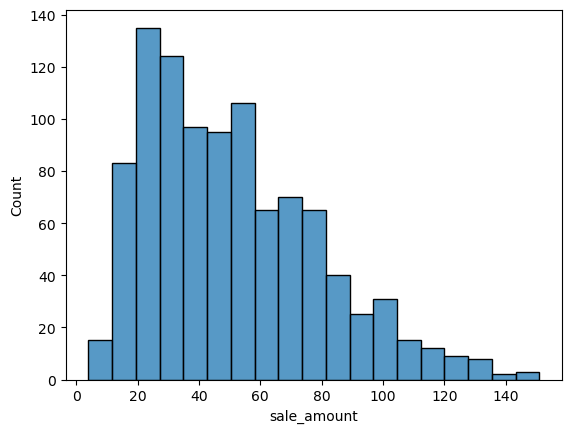

In [9]:
sns.histplot(x ='sale_amount', data= df2.sample(1000))

<AxesSubplot:xlabel='item_price', ylabel='Count'>

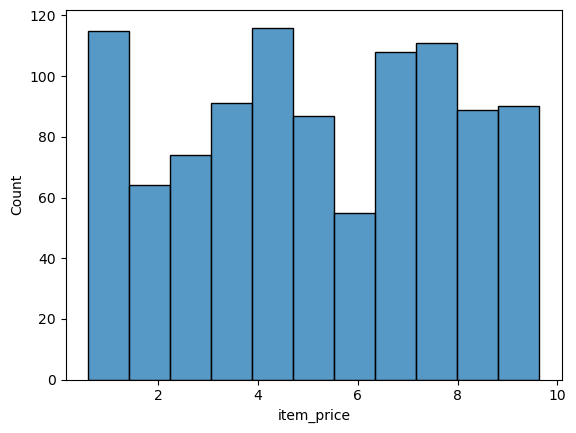

In [10]:
sns.histplot(x ='item_price', data= df2.sample(1000))

## Set the index to be the datetime variable.

In [11]:
df.head(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217


## Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_of_week
df.sample(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2014-09-30,49,Smart Living,Smart Living Charcoal Lighter Fluid,5.34,1520 Austin Hwy,78218,9,1
2016-02-21,109,Honest Tea,Honest Tea Peach White Tea,3.93,15000 San Pedro Ave,78232,2,6
2015-04-20,84,Garnier Nutritioniste,Garnier Nutritioniste Moisture Rescue Fresh Cleansing Foam,6.47,8503 NW Military Hwy,78231,4,0


## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [13]:
df['sales_total'] = df['sale_amount'] * df['item_price']
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,1,1,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,12018 Perrin Beitel Rd,78217,1,1,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,1,1,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,15000 San Pedro Ave,78232,1,1,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,735 SW Military Dr,78221,1,1,294.00


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [14]:
# Function

def prep_sales(df):
    
    '''
    Intakes sales df and preps it by coverting to datetime dtype and setting it as the 
    index. Creates month, day of week, and total sales columns.
    '''
    
    # Converting to datetime type
    df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
    
    # Set date as index
    df = df.set_index('sale_date')

    # Creating date columns
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    
    # Total sales column
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df


In [15]:
def dist_sales(df):
    
    # Plot Sale Amount
    sns.histplot(x ='sale_amount', data= df.sample(10000))
    
    # Plot Item Price
    sns.histplot(x ='item_price', data= df.sample(10000))

In [16]:
prep_sales(df2).head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Wednesday,9.24
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Thursday,11.76
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Friday,10.92
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Saturday,8.40


In [17]:
def dist_sales():
    
    
    
    df.groupby('sale_date')['sale_amount'].sum().plot()
    plt.show()
    
    
    df.item_price.resample('M').sum().plot()
    plt.show()

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [18]:
ops = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [19]:
ops.shape

(4383, 5)

## Convert date column to datetime format.

In [20]:
ops['Date'] = pd.to_datetime(ops.Date)
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [21]:
# Normalizing column names
ops.columns = ops.columns = ops.columns.str.lower()
ops.columns = ops.columns.str.replace('+','_')

In [22]:
ops.head(3)

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


## Plot the distribution of each of your variables.

<AxesSubplot:xlabel='date'>

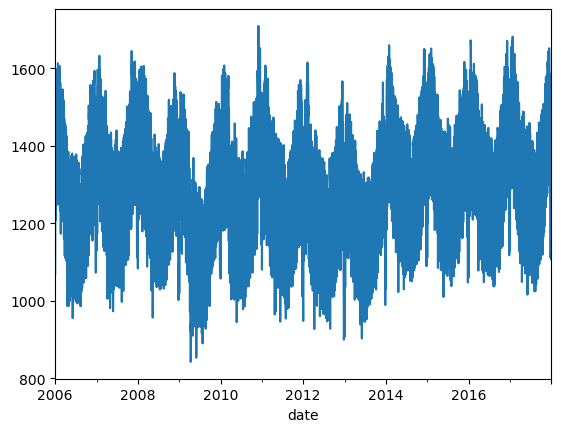

In [23]:
# Consumption
ops.groupby('date').consumption.sum().plot()

<AxesSubplot:xlabel='consumption', ylabel='Count'>

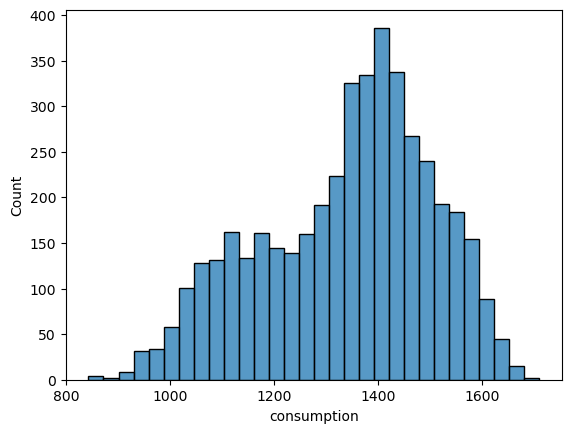

In [24]:
sns.histplot(x='consumption', data=ops)

<AxesSubplot:xlabel='date'>

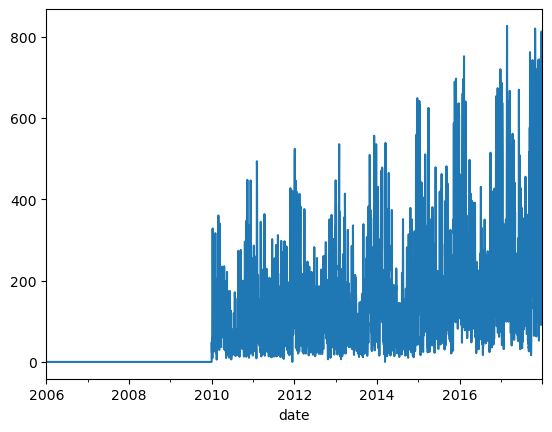

In [25]:
# Wind
ops.groupby('date').wind.sum().plot()

<AxesSubplot:xlabel='wind', ylabel='Count'>

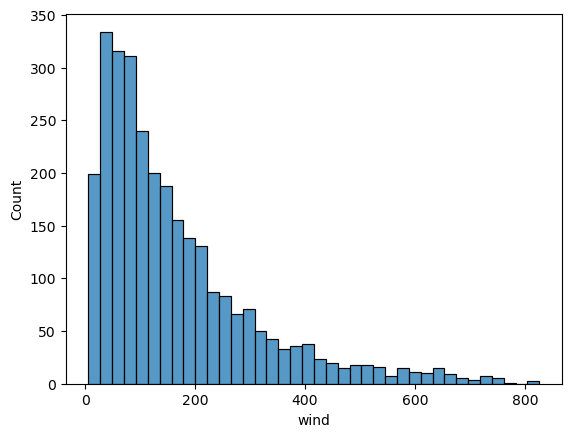

In [26]:
sns.histplot(x='wind', data=ops)

<AxesSubplot:xlabel='date'>

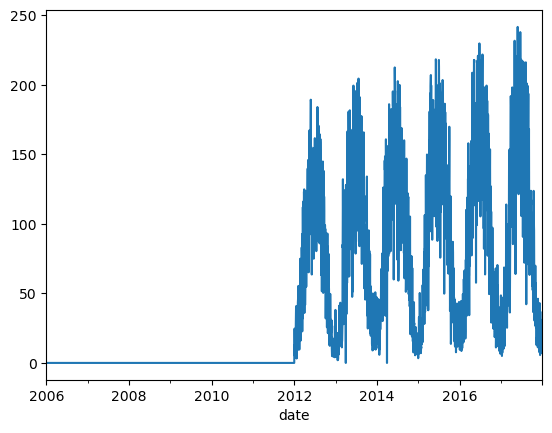

In [27]:
# Solar
ops.groupby('date').solar.sum().plot()

<AxesSubplot:xlabel='solar', ylabel='Count'>

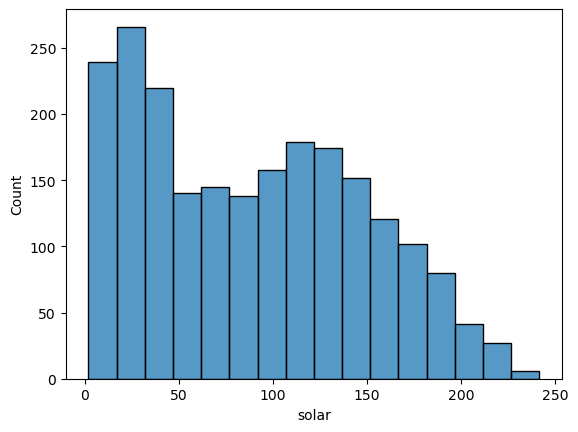

In [28]:
sns.histplot(x='solar', data=ops)

<AxesSubplot:xlabel='date'>

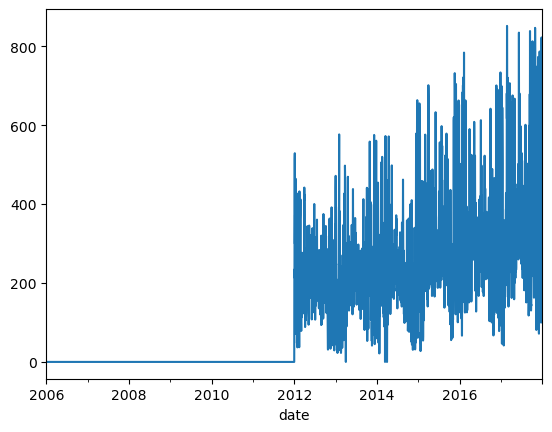

In [29]:
# Wind and Solar
ops.groupby('date').wind_solar.sum().plot()

<AxesSubplot:xlabel='wind_solar', ylabel='Count'>

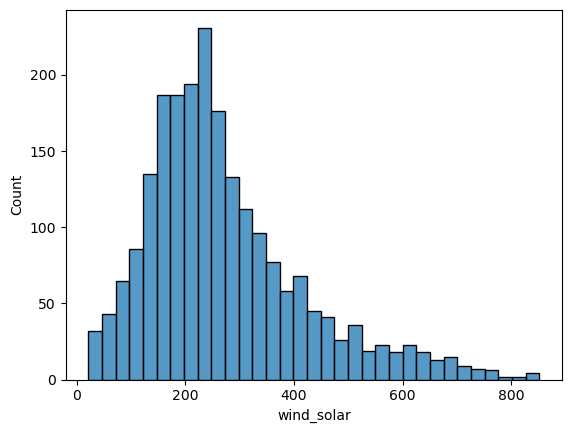

In [30]:
sns.histplot(x='wind_solar', data=ops)

## Set the index to be the datetime variable.

In [31]:
ops = ops.set_index('date')
ops.head(3)

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [32]:
ops = ops.sort_index()
ops.head(15)

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


## Add a month and a year column to your dataframe.

In [33]:
ops['month'] = ops.index.month
ops['year'] = ops.index.year
ops.sample(3)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2016-10-24,1482.911,111.547,34.942,146.489,10,2016
2010-06-05,1060.277,10.426,NaN,NaN,6,2010
2016-10-19,1503.565,204.847,38.170,243.017,10,2016


## Fill any missing values.

In [34]:
ops.isna().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [35]:
ops.describe().T

,count,mean,std,min,25%,50%,75%,max
consumption,4383.0,1338.675836,165.775710,842.395,1217.85900,1367.123,1457.76100,1709.568
wind,2920.0,164.814173,143.692732,5.757,62.35325,119.098,217.90025,826.278
solar,2188.0,89.258695,58.550099,1.968,35.17925,86.407,135.07150,241.580
wind_solar,2187.0,272.663481,146.319884,21.478,172.18550,240.991,338.98800,851.556
month,4383.0,6.522930,3.449097,1.000,4.00000,7.000,10.00000,12.000
year,4383.0,2011.500342,3.452347,2006.000,2008.50000,2012.000,2014.50000,2017.000


In [36]:
# Back Fill
ops = ops.bfill()
ops.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [37]:

def get_ops():
    filename = "ops.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    else:
        
        # Read csv from URL
        df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
        
        # Format date to datetime dtype
        df['Date'] = pd.to_datetime(df.Date)

        # Set date as index
        df = df.set_index('date')
        df = df.sort_index()

        # Create month and year columns
        df['month'] = df.index.month
        df['year'] = df.index.year
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe
        return df  

In [38]:

def dist_ops(df):


    # Consumption
    sns.histplot(x='consumption', data=ops)
    plt.show()

    # Wind
    sns.histplot(x='wind', data=ops)
    plt.show()
    
    # Solar
    sns.histplot(x='solar', data=ops)
    plt.show()
    
    # Wind and Solar
    sns.histplot(x='wind_solar', data=ops)
    plt.show()
    
    
